In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
%pwd

'/Users/yvesgreatti/github/kaggle_favorita_grocery_sales_forecasting/notebook'

In [6]:
dtype_dict={"id":np.uint32,
            "store_nbr":np.uint8,
            "item_nbr":np.uint32,
            "unit_sales":np.float32
           }
df = pd.read_csv("../output/data/train_top_10_store_10_item.csv", dtype=dtype_dict)

/var/folders/w3/d06m5l_97yn4bnxd5t6cgbjr0000gn/T/ipykernel_22261/2375169706.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../output/data/train_top_10_store_10_item.csv", dtype=dtype_dict)


In [7]:
df.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion
0,2013-01-02,3,114790,27.0,NaN
1,2013-01-02,3,305229,105.0,NaN
2,2013-01-02,3,314384,143.0,NaN
3,2013-01-02,3,364606,219.0,NaN
4,2013-01-02,3,502331,147.0,NaN


In [8]:
df["date"] = pd.to_datetime(df["date"])


In [9]:
df.sort_values(["date"], inplace=True)

In [10]:
df["date"].unique()

<DatetimeArray>
['2013-01-02 00:00:00', '2013-01-03 00:00:00', '2013-01-04 00:00:00',
 '2013-01-05 00:00:00', '2013-01-06 00:00:00', '2013-01-07 00:00:00',
 '2013-01-08 00:00:00', '2013-01-09 00:00:00', '2013-01-10 00:00:00',
 '2013-01-11 00:00:00',
 ...
 '2017-08-06 00:00:00', '2017-08-07 00:00:00', '2017-08-08 00:00:00',
 '2017-08-09 00:00:00', '2017-08-10 00:00:00', '2017-08-11 00:00:00',
 '2017-08-12 00:00:00', '2017-08-13 00:00:00', '2017-08-14 00:00:00',
 '2017-08-15 00:00:00']
Length: 1679, dtype: datetime64[ns]

In [20]:
oil = pd.read_csv("../data/oil.csv", parse_dates=['date'])


In [23]:
oil.head()

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [22]:
oil['dcoilwtico'] = oil['dcoilwtico'].interpolate()
oil['dcoilwtico'] = oil['dcoilwtico'].fillna(method='bfill')
oil.isnull().sum()


/var/folders/w3/d06m5l_97yn4bnxd5t6cgbjr0000gn/T/ipykernel_22261/677364325.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oil['dcoilwtico'] = oil['dcoilwtico'].fillna(method='bfill')


date          0
dcoilwtico    0
dtype: int64

In [39]:
sales_oil = df.groupby("date")["unit_sales"].sum().reset_index()  # Aggregate daily sales
sales_oil = sales_oil.merge(oil, on="date", how="left") 
sales_oil.head(5)

,date,unit_sales,dcoilwtico
0,2013-01-02,11464.573242,93.14
1,2013-01-03,7595.802246,92.97
2,2013-01-04,8107.185059,93.12
3,2013-01-05,10972.316406,NaN
4,2013-01-06,13856.410156,NaN


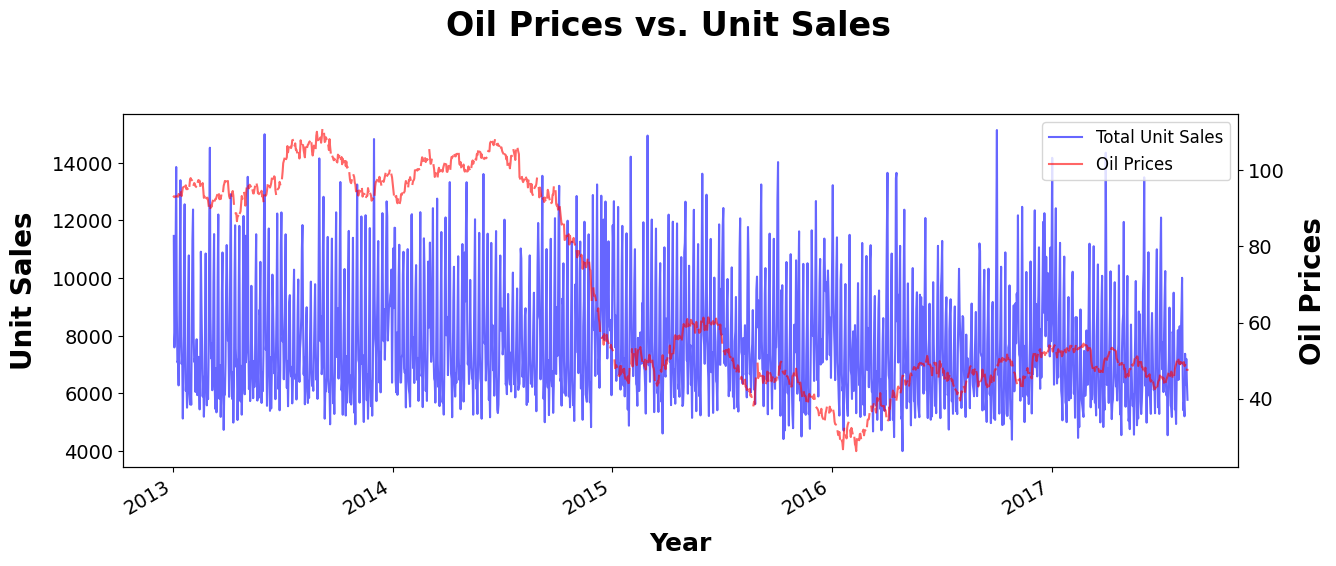

In [50]:

# Create figure + primary axis
fig, ax = plt.subplots(figsize=(14, 6))

# Adjust margins
fig.subplots_adjust(bottom=0.15, left=0.2, hspace=0.5, wspace=0.5)

# Plot on primary y-axis
ax.plot(
    sales_oil["date"],
    sales_oil["unit_sales"],
    label="Total Unit Sales",
    color="blue",
    alpha=0.6
)
ax.set_ylabel(
    "Unit Sales",
    labelpad=10,
    fontsize=20,
    fontweight="bold"
)

# Create secondary y-axis
ax2 = ax.twinx()
ax2.plot(
    sales_oil["date"],
    sales_oil["dcoilwtico"],
    label="Oil Prices",
    color="red",
    alpha=0.6
)
ax2.set_ylabel(
    "Oil Prices",
    labelpad=10,
    fontsize=20,
    fontweight="bold"
)

# Common x-axis label and title
ax.set_xlabel(
    "Year",
    labelpad=10,
    fontsize=18,
    fontweight="bold"
)
fig.suptitle(
    "Oil Prices vs. Unit Sales",
    fontsize=24,
    fontweight="bold"
)

# Increase tick label size on both axes
ax.tick_params(axis="both", which="major", labelsize=14)
ax2.tick_params(axis="y", which="major", labelsize=14)

# If you want rotated x‑ticks for readability:
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# Add legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, fontsize=12, loc="best")

fig.tight_layout(pad=3.0)

plt.savefig("../output/figures/oil_sale.tiff", dpi=300, bbox_inches="tight")
plt.show()
plt.close()         # closes the current figure



In [51]:
len(df)

167803

In [53]:
# Extract store-item pairs from the 'id' column
df["store_item"] = df["store_nbr"].astype(str).str.cat(df["item_nbr"].astype(str), sep="_")
print("Unique (store, item) pairs:", df["store_item"].nunique())


Unique (store, item) pairs: 100


In [56]:
 # Save to a new CSV
df.to_csv(
    "../output/data/train_top_10_store_10_item.csv",
    index=False
)

In [ ]:
df["date"] = pd.to_datetime(df["date"])
df["unit_sales"] = df["unit_sales"].fillna(0)
df['unit_sales'] = df['unit_sales'].clip(lower=0)

In [ ]:
df["date"].unique()

In [ ]:

# assume df["date"] is datetime64[ns]
min_date = df["date"].min()

# compute the Monday of the week containing min_date
week_start = min_date - pd.Timedelta(days=min_date.weekday())
week_start
#if min_date is already a Monday, keep that; otherwise bump to next week’s Monday
if min_date.weekday() == 0:
    first_monday = week_start
else:
    first_monday = week_start + pd.Timedelta(days=7)

print("min_date:", min_date)
print("first day of the first full week:", first_monday)
df = df[df['date'] >= first_monday]


In [ ]:
 # Save to a new CSV
df.to_csv(
    "../output/data/train_top_10_store_10_item.csv",
    index=False
)